# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202304 
## SECTION: Visualizing data
### VIDEO: Bar plots
#### TEACHER: Mike X Cohen, sincxpress.com


In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

 np.zeros는 NumPy 라이브러리에서 제공하는 함수로, 주어진 크기(shape)의 배열을 생성하고 모든 요소를 0으로 초기화합니다. 이 함수는 배열을 초기화하거나 특정 크기의 배열을 빠르게 생성할 때 유용합니다.

## 기본 문법
### 매개변수
- shape: 생성할 배열의 크기를 지정합니다. 튜플 형태로 다차원 배열의 크기를 지정할 수 있습니다. 예: (3, 4)는 3행 4열의 2차원 배열을 생성합니다.
- dtype: 배열 요소의 데이터 타입을 지정합니다. 기본값은 float입니다. 예: int, float, bool 등.
- order: 메모리에서 배열의 저장 순서를 지정합니다. - 'C'는 행 우선(C 스타일), 'F'는 열 우선(Fortran 스타일)입니다. 기본값은 'C'입니다.
### 주요 사용 사례
- 배열 초기화: 계산을 시작하기 전에 특정 크기의 배열을 0으로 초기화.
- 메모리 할당: 나중에 데이터를 채울 배열을 미리 생성.

In [ ]:
## create data for the bar plot

# data sizes
m = 30 # rows
n =  6 # columns

# generate data
data = np.zeros((m,n))


for i in range(n):
    data[:,i] = 30*np.random.randn(m) * (2*i/(n-1)-1)**2 + (i+1)**2

6


이 코드는 바 그래프(bar plot)에 사용될 데이터를 생성합니다. 생성되는 데이터는 총 `n`개의 열(column)으로 구성되며, 각 열에는 `m`개의 행(row)에 해당하는 숫자가 포함됩니다.

`for i in range(n):` 루프는 0부터 `n-1`까지 각 열의 인덱스 `i`에 대해 반복하면서 다음 연산을 수행합니다.

1.  **랜덤 숫자 생성 (`np.random.randn(m)`)**
    * 표준 정규 분포(평균 0, 표준편차 1)를 따르는 난수를 `m`개 생성합니다. 이 `m`개의 난수는 현재 처리 중인 `i`번째 열의 기본적인 랜덤 값을 이룹니다.

2.  **랜덤 숫자 스케일링 (`30 * np.random.randn(m)`)**
    * 앞서 생성된 `m`개의 난수 각각에 30을 곱합니다.
    * 이는 난수의 스케일(진폭)을 30배로 증가시켜 데이터의 변동 폭을 키웁니다.

3.  **열 위치 기반 값 계산 (`(2*i/(n-1)-1)`)**
    * 현재 열의 인덱스 `i`와 전체 열의 수 `n`을 사용하여 특정 값을 계산합니다.
    * `i/(n-1)`은 `i` 값을 0과 1 사이로 정규화합니다.
    * `2*i/(n-1)`은 이 값을 0과 2 사이로 만듭니다.
    * 최종적으로 1을 빼서, 이 표현식의 결과는 `i=0`일 때 -1, `i=n-1`일 때 1이 되며, `i`가 중간값일수록 0에 가까워집니다.

4.  **가중치 계산 (`(2*i/(n-1)-1)**2`)**
    * 3번에서 계산된 값을 제곱합니다.
    * 이 제곱 연산으로 값의 범위는 0과 1 사이가 됩니다.
        * `i=0` (첫 번째 열)과 `i=n-1` (마지막 열)에서는 이 값이 1에 가깝습니다.
        * `i`가 열의 중간에 가까울수록 이 값은 0에 가까워집니다.
    * 이 값은 열의 위치에 따라 랜덤 성분의 강도를 조절하는 가중치 역할을 합니다.

5.  **가중치 적용된 난수 계산 (`30*np.random.randn(m) * (2*i/(n-1)-1)**2`)**
    * 2번에서 스케일링된 난수에 4번에서 계산된 열별 가중치를 곱합니다.
    * 결과적으로, 양 끝 열(`i=0` 또는 `i=n-1`)에서는 난수의 변동성이 비교적 크게 유지됩니다 (가중치가 1이므로).
    * 중앙에 가까운 열에서는 가중치가 0에 가까워지므로 난수의 변동성이 크게 줄어듭니다. 이는 데이터 변동성이 열의 양 끝에서 크고 중앙에서 작은 U자형 패턴을 형성합니다.

6.  **열별 오프셋 계산 (`(i+1)**2`)**
    * 현재 열 인덱스 `i`에 1을 더한 후 제곱합니다.
    * `i`가 0부터 `n-1`까지 증가함에 따라, 이 값은 $1^2, 2^2, \dots, n^2$ 과 같이 제곱으로 커집니다.
    * 이는 각 열의 데이터에 더해지는 기본 오프셋(offset) 값으로, 열이 진행될수록 데이터의 전체적인 평균 수준을 높입니다.

7.  **최종 열 데이터 계산 (`... + (i+1)**2`)**
    * 5번에서 계산된, 열별 가중치가 적용된 난수 값에 6번에서 계산된 열별 오프셋을 더합니다.
    * 이것이 `i`번째 열의 최종 데이터가 됩니다.

### 요약

이 코드는 각 열(`i`)에 대해 다음을 수행합니다:
* 기본적인 난수를 생성하고 그 변동 폭을 키웁니다.
* 열의 위치에 따라 U자형 가중치를 적용하여 난수의 변동성을 조절합니다. (양 끝에서 변동성이 크고, 중앙에서 작습니다.)
* 열의 위치에 따라 제곱으로 증가하는 오프셋을 더하여, 뒤쪽 열로 갈수록 데이터의 전체적인 평균값이 커지도록 합니다.

따라서 생성되는 `data` 배열은 각 열마다 다른 평균과 다른 분산(변동성)을 가집니다. 이러한 특성은 바 플롯으로 시각화했을 때, 오른쪽으로 갈수록 막대의 평균 높이가 증가하고, 막대 높이의 편차는 양 끝에서 크고 중앙에서 작게 나타나는 패턴으로 관찰될 것입니다.

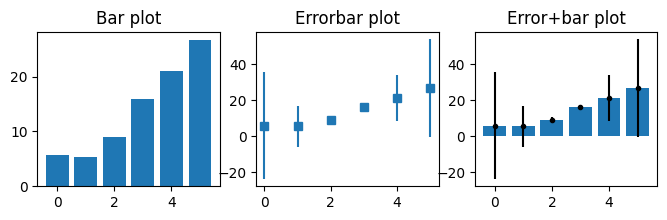

In [6]:
# show the bars!

fig,ax = plt.subplots(1,3,figsize=(8,2))

# 'naked' bars
ax[0].bar(range(n),np.mean(data,axis=0))
ax[0].set_title('Bar plot')

# just the error bars
ax[1].errorbar(range(n),np.mean(data,axis=0),np.std(data,axis=0,ddof=1),marker='s',linestyle='')
ax[1].set_title('Errorbar plot')

# both
ax[2].bar(range(n),np.mean(data,axis=0))
ax[2].errorbar(range(n),np.mean(data,axis=0),np.std(data,axis=0,ddof=1),marker='.',linestyle='',color='k')
ax[2].set_title('Error+bar plot')

plt.show()


### 코드 설명

1.  **`fig, ax = plt.subplots(1, 3, figsize=(8, 2))`**

      * `plt.subplots()` 함수를 사용하여 하나의 그림(figure)과 그 안에 여러 개의 하위 플롯(axes)을 생성한다.
      * `1, 3`은 하위 플롯을 1행 3열의 격자로 배열한다는 의미이다. 따라서 총 3개의 하위 플롯이 생성된다.
      * `figsize=(8, 2)`는 그림의 전체 크기를 가로 8인치, 세로 2인치로 지정한다.
      * `fig`는 전체 그림 객체를, `ax`는 3개의 하위 플롯 객체들을 담고 있는 배열(Numpy array)이다. `ax[0]`, `ax[1]`, `ax[2]`를 통해 각 하위 플롯에 접근할 수 있다.

2.  **첫 번째 하위 플롯: 막대 그래프 (Naked bars)**

      * **`ax[0].bar(range(n), np.mean(data, axis=0))`**
          * `ax[0]`은 첫 번째 하위 플롯을 선택한다.
          * `.bar()` 함수는 막대 그래프를 그린다.
          * `range(n)`은 x축의 위치를 지정한다. `n`개의 열이 있으므로 0부터 `n-1`까지의 정수 시퀀스가 된다. 각 막대의 x축 좌표이다.
          * `np.mean(data, axis=0)`은 `data` 배열의 각 열(axis=0)에 대한 평균값을 계산한다. 이 값들이 각 막대의 높이가 된다.
      * **`ax[0].set_title('Bar plot')`**
          * 첫 번째 하위 플롯의 제목을 'Bar plot'으로 설정한다.

3.  **두 번째 하위 플롯: 에러 바만 있는 그래프 (Error bars only)**

      * **`ax[1].errorbar(range(n), np.mean(data, axis=0), np.std(data, axis=0, ddof=1), marker='s', linestyle='')`**
          * `ax[1]`은 두 번째 하위 플롯을 선택한다.
          * `.errorbar()` 함수는 에러 바를 포함한 그래프를 그린다.
          * `range(n)`은 x축 값이다.
          * `np.mean(data, axis=0)`은 y축 값으로, 각 에러 바의 중심 위치(평균)가 된다.
          * `np.std(data, axis=0, ddof=1)`은 각 y값에 대한 오차의 크기(표준편차)를 지정한다. `ddof=1`은 표본 표준편차를 계산하도록 한다 (자유도 1 감소).
          * `marker='s'`는 각 평균 지점을 사각형('square') 마커로 표시한다.
          * `linestyle=''` 또는 `ls='none'`은 마커들을 연결하는 선을 그리지 않도록 설정한다.
      * **`ax[1].set_title('Errorbar plot')`**
          * 두 번째 하위 플롯의 제목을 'Errorbar plot'으로 설정한다.

4.  **세 번째 하위 플롯: 막대 그래프와 에러 바 (Both)**

      * **`ax[2].bar(range(n), np.mean(data, axis=0))`**
          * `ax[2]`는 세 번째 하위 플롯을 선택한다.
          * 첫 번째 플롯과 동일하게 막대 그래프를 그린다.
      * **`ax[2].errorbar(range(n), np.mean(data, axis=0), np.std(data, axis=0, ddof=1), marker='.', linestyle='', color='k')`**
          * 두 번째 플롯과 유사하게 에러 바를 그린다. 이 에러 바는 이미 그려진 막대 그래프 위에 겹쳐서 표시된다.
          * `marker='.'`는 각 평균 지점을 작은 점(point) 마커로 표시한다.
          * `color='k'`는 에러 바와 마커의 색상을 검은색('black')으로 지정한다.
      * **`ax[2].set_title('Error+bar plot')`**
          * 세 번째 하위 플롯의 제목을 'Error+bar plot'으로 설정한다.

5.  **`plt.show()`**

      * 지금까지 구성한 모든 플롯을 화면에 표시한다.

### 요약

이 코드는 `matplotlib.pyplot`을 사용하여 `data`의 열별 통계치를 세 가지 방식으로 시각화한다:

  * 첫 번째는 각 열의 평균값을 나타내는 기본적인 막대 그래프이다.
  * 두 번째는 각 열의 평균과 표준편차를 나타내는 에러 바 그래프이다 (막대 없이, 마커와 에러 바만 표시).
  * 세 번째는 막대 그래프 위에 해당 열의 평균과 표준편차를 나타내는 에러 바를 함께 표시한 그래프이다.

이를 통해 데이터의 중심 경향성(평균)과 변동성(표준편차)을 다양한 관점에서 파악할 수 있다.

-----

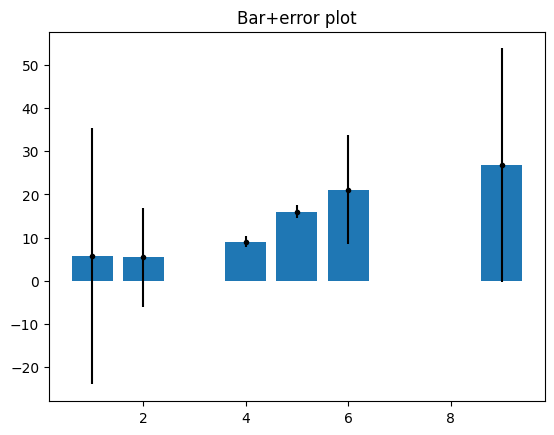

In [7]:
## manually specify x-axis coordinates

xcrossings = [ 1, 2, 4, 5, 6, 9 ]

plt.bar(xcrossings,np.mean(data,axis=0))
plt.errorbar(xcrossings,np.mean(data,axis=0),np.std(data,axis=0,ddof=1),marker='.',linestyle='',color='k')
plt.title('Bar+error plot')

plt.show()


### xcrossings = [ 1, 2, 4, 5, 6, 9 ] 
xcrossings = [ 1, 2, 4, 5, 6, 9 ]

- 이 리스트는 그래프에 표시될 각 막대 및 에러 바의 x축 중심 위치를 수동으로 정의한다.
- 리스트의 각 값은 data 배열의 순차적인 열(0번째 열, 1번째 열 등)에 해당하며, 그 열로부터 계산된 통계치(평균, 표준편차)가 그려질 x 좌표가 된다.
- 이 리스트의 길이는 data 배열의 열 개수(n)와 일치해야 한다.

이 코드는 data 배열의 각 열에서 계산된 평균값을 막대의 높이로, 표준편차를 에러 바의 크기로 하여 그래프를 그린다. 중요한 점은 range(n)과 같이 0부터 시작하는 정수 시퀀스 대신 xcrossings라는 사용자 정의 리스트를 x축 좌표로 사용함으로써, 각 데이터 열에 해당하는 막대와 에러 바를 x축 상의 특정, 임의의 위치에 배치할 수 있다는 것이다. 이를 통해 데이터의 시각적 그룹핑이나 특정 간격 조정을 사용자의 의도대로 수행할 수 있다

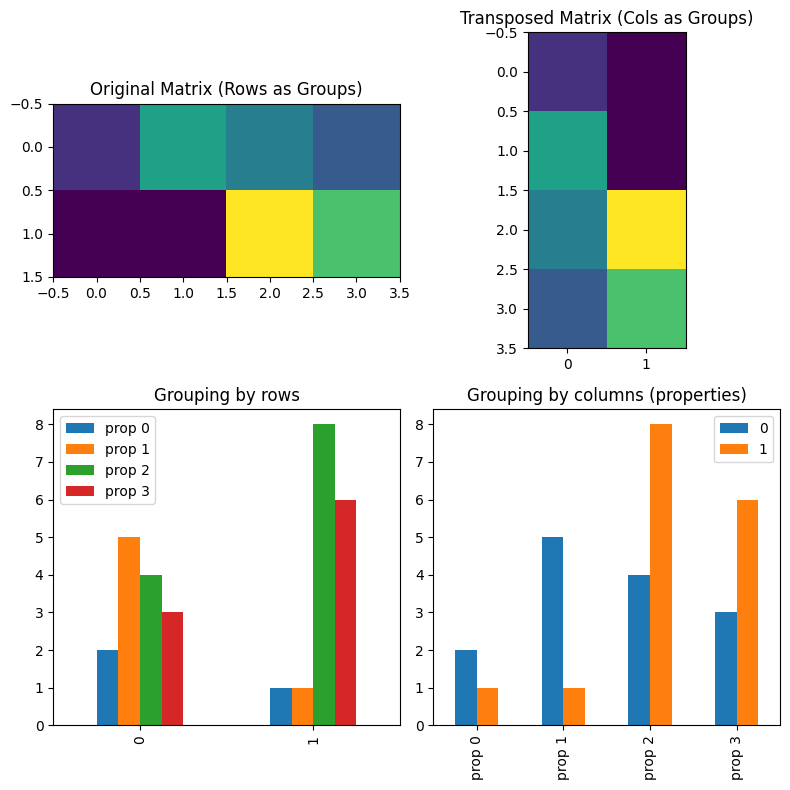

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # pandas import 추가

# 데이터 정의: data are groups (rows) X property (columns)
m = [ [2,5,4,3], [1,1,8,6] ]

# 2x2 subplot 그리드 생성
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(8,8))

# --- 첫 번째 관점: 데이터를 <행> 그룹의 <열> 속성으로 개념화 ---

# ax[0,0]: 원본 행렬을 이미지로 표시
ax[0,0].imshow(m)
ax[0,0].set_title('Original Matrix (Rows as Groups)') 

# ax[1,0]: pandas DataFrame을 사용하여 행별 그룹핑 막대 그래프 표시
# DataFrame 생성 (행: 그룹, 열: 속성)
df = pd.DataFrame(m,columns=['prop 0','prop 1','prop 2','prop 3'])
# 각 행 인덱스(0, 1)를 기준으로 그룹화하고, 각 그룹 내에 속성별 막대 표시
df.plot(ax=ax[1,0],kind='bar')
ax[1,0].set_title('Grouping by rows')


# --- 두 번째 관점: 데이터를 <열> (속성) 그룹의 <행> 값으로 개념화 ---

# ax[0,1]: 전치된 행렬을 이미지로 표시
# np.array(m).T는 행렬 m을 NumPy 배열로 변환 후 전치(행과 열을 바꿈)
ax[0,1].imshow(np.array(m).T)
ax[0,1].set_title('Transposed Matrix (Cols as Groups)') # 제목 추가 권장

# ax[1,1]: 전치된 DataFrame을 사용하여 열별 그룹핑 막대 그래프 표시
# df.T는 DataFrame을 전치 (원본의 열이 새 행이 되고, 원본의 행이 새 열이 됨)
# 각 'prop' (원본의 열)을 기준으로 그룹화하고, 각 그룹 내에 원본 행별 막대 표시
df.T.plot(ax=ax[1,1],kind='bar')
ax[1,1].set_title('Grouping by columns (properties)') # 제목 수정 권장

plt.tight_layout() # 플롯간 간격 자동 조절 (추가 권장)
plt.show()

#### 데이터 정의 (`m`)

* `m = [ [2,5,4,3], [1,1,8,6] ]`
    2개의 행과 4개의 열을 가지는 2차원 리스트(행렬)를 정의합니다.
    여기서 각 행은 하나의 '그룹' 또는 '샘플'을 나타내고, 각 열은 해당 그룹의 '속성' 또는 '특성' 값을 나타낸다고 가정할 수 있습니다. (예: 2개의 그룹, 각 그룹은 4개의 속성값을 가짐)

#### Subplot 그리드 생성

* `fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(8,8))`
    2행 2열의 구조를 가지는 총 4개의 하위 플롯(subplot)을 담을 수 있는 그림(figure)과 축(axes) 객체를 생성합니다. 그림의 전체 크기는 가로 8인치, 세로 8인치로 지정합니다.
    `ax[row, col]` 형태로 각 하위 플롯에 접근할 수 있습니다 (예: `ax[0,0]`, `ax[1,0]`).

#### 첫 번째 관점: 행(Row) 기준 그룹핑

* **`ax[0,0].imshow(m)` (상단 좌측 플롯)**
    원본 행렬 `m`을 이미지 형태로 시각화합니다.
    `imshow`는 행렬의 각 값을 색상으로 표현합니다. 기본적으로 값이 클수록 밝은 색, 작을수록 어두운 색으로 표시될 수 있습니다 (컬러맵에 따라 다름).
    이 시각화는 2개의 행(그룹)과 각 그룹 내 4개의 열(속성) 값의 분포를 한눈에 보여줍니다.

* **`df = pd.DataFrame(m,columns=['prop 0','prop 1','prop 2','prop 3'])`**
    원본 리스트 `m`을 사용하여 `pandas` DataFrame을 생성합니다.
    각 행은 DataFrame의 행이 되고, `columns` 인자를 통해 각 열에 'prop 0'부터 'prop 3'까지의 이름을 부여합니다.
    `df`의 형태:
    ```
       prop 0  prop 1  prop 2  prop 3
    0       2       5       4       3
    1       1       1       8       6
    ```

* **`df.plot(ax=ax[1,0],kind='bar')` (하단 좌측 플롯)**
    생성된 DataFrame `df`에 대해 막대 그래프(`kind='bar'`)를 그립니다.
    `pandas` DataFrame의 `plot()` 메소드는 기본적으로 DataFrame의 인덱스(여기서는 0, 1)를 x축의 주요 그룹으로 사용합니다.
    각 인덱스 그룹(0번 그룹, 1번 그룹) 내에서, 각 열('prop 0', 'prop 1', 'prop 2', 'prop 3')의 값이 별도의 막대로 표시됩니다 (그룹형 막대 그래프).
    즉, 이 플롯은 각 행(row)을 하나의 그룹으로 보고, 그 그룹 내의 속성(column)들을 비교하는 방식입니다.

* **`ax[1,0].set_title('Grouping by rows')`**
    하단 좌측 플롯의 제목을 설정합니다.

#### 두 번째 관점: 열(Column) 기준 그룹핑 (속성 기준 그룹핑)

* **`ax[0,1].imshow(np.array(m).T)` (상단 우측 플롯)**
    원본 리스트 `m`을 `numpy` 배열로 변환한 후 `.T`를 사용하여 전치(transpose)합니다. 전치는 행과 열을 서로 바꾸는 연산입니다.
    원본 `m`이 (2행 4열)이었다면, `np.array(m).T`는 (4행 2열) 행렬이 됩니다.
    이 전치된 행렬을 이미지로 시각화합니다. 이제는 원본의 각 열(속성)이 새로운 행이 되어 시각화의 기준이 됩니다.

* **`df.T.plot(ax=ax[1,1],kind='bar')` (하단 우측 플롯)**
    원본 DataFrame `df`를 전치한 `df.T`에 대해 막대 그래프를 그립니다.
    `df.T`의 형태:
    ```
            0  1  <-- 원본의 행 인덱스가 열 이름이 됨
    prop 0  2  1
    prop 1  5  1
    prop 2  4  8
    prop 3  3  6
    ```
    `df.T.plot(kind='bar')`는 이제 `df.T`의 인덱스('prop 0', 'prop 1', 'prop 2', 'prop 3')를 x축의 주요 그룹으로 사용합니다.
    각 'prop' 그룹 내에서, `df.T`의 열(원본 DataFrame의 인덱스였던 0, 1)의 값이 별도의 막대로 표시됩니다.
    즉, 이 플롯은 원본 데이터의 각 열(column/property)을 하나의 그룹으로 보고, 그 그룹 내에서 각 행(row/original group)의 값을 비교하는 방식입니다.

* **`ax[1,1].set_title('Grouping by columns')`**
    하단 우측 플롯의 제목을 설정합니다. (좀 더 명확하게 'Grouping by properties (original columns)' 등으로 할 수도 있습니다.)

#### `plt.show()`
* 구성된 4개의 플롯을 모두 화면에 표시합니다.
* (주석 처리되었지만) `plt.tight_layout()`을 사용하면 플롯들 사이의 간격이나 제목이 겹치지 않도록 자동으로 조절해주는 역할을 합니다.

### 요약

이 코드는 동일한 2차원 데이터를 두 가지 다른 방식으로 해석하고 시각화하는 방법을 보여줍니다:

* **행을 기준 그룹으로 보는 관점**: 각 행을 개별 그룹으로 취급하고, 각 그룹 내에서 여러 속성(열) 값들을 비교합니다. (좌측 플롯들)
* **열(속성)을 기준 그룹으로 보는 관점**: 각 열(속성)을 개별 그룹으로 취급하고, 각 그룹 내에서 여러 원본 행의 값들을 비교합니다. 이는 데이터를 전치(transpose)함으로써 효과적으로 달성됩니다. (우측 플롯들)

`imshow`는 행렬 값의 분포를 시각적으로 빠르게 파악하는 데 유용하며, `pandas` DataFrame의 `plot` 기능은 특정 기준(행 또는 열)에 따른 그룹별 비교를 막대 그래프로 명확하게 보여주는 데 효과적입니다. 데이터의 구조와 분석 목적에 따라 적절한 시각화 관점을 선택하는 것이 중요합니다.